## Problem Statement: Predict the sales demand for consumer goods.

#### The objective of this exercise is to predict sales of 2018-42 to 2018-52 of each SKU. The data present in the mentioned week are only for computation of accuracy and bias only. So please use the sales data till 2018-41.

The attached excel contains 4 columns:

a.	SKU

b.	ISO_Week

c.	Sales

d.	Season

Below is the promotional details for the mentioned SKU (Stock keeping Unit)


In [1]:
#importing all Required libraries   
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import warnings
warnings.filterwarnings('ignore')

### Data Pre-Processing 

In [2]:
# Assigning working directory 
os.chdir("C:/Users/Hp/Desktop/EY")

In [3]:
# Assigning the data set 
df = pd.read_excel("case_study.xlsx")

In [4]:
# Disply top 5 observation 
df.head()

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER


## Exploratory Data Analysis (EDA)


In [5]:
# Disply information of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SKU         150 non-null object
ISO_Week    150 non-null object
Sales       143 non-null float64
Season      150 non-null object
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


In [6]:
# Shape of data set 
df.shape

(150, 4)

In [7]:
df.describe()

,Sales
count,143.000000
mean,5279.776224
std,6184.437917
min,-163.000000
25%,290.500000
50%,4341.000000
75%,10191.500000
max,52524.000000


In [8]:
df.nunique()

SKU           3
ISO_Week     52
Sales       116
Season        4
dtype: int64

In [9]:
df = df[~df['SKU'].isin(['colgate', 'pepsodent', 'closeup'])]
df

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER
...,...,...,...,...
145,ProductC,2018-48,12927.0,AUTUMN
146,ProductC,2018-49,11595.0,WINTER
147,ProductC,2018-50,10061.0,WINTER
148,ProductC,2018-51,10859.0,WINTER


### Missing Value Analysis 

In [10]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())
missing_val

,0
SKU,0
ISO_Week,0
Sales,7
Season,0


In [11]:
# missing value percentege in asending order 
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index':'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,Sales,4.666667
1,SKU,0.000000
2,ISO_Week,0.000000
3,Season,0.000000


In [12]:
# filling missing values using mean method 
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
print (df.isnull().sum())

SKU         0
ISO_Week    0
Sales       0
Season      0
dtype: int64


In [13]:
df = df.fillna(df.mean())
df1 = df.copy()
df

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER
...,...,...,...,...
145,ProductC,2018-48,12927.0,AUTUMN
146,ProductC,2018-49,11595.0,WINTER
147,ProductC,2018-50,10061.0,WINTER
148,ProductC,2018-51,10859.0,WINTER


### Outlier treatment

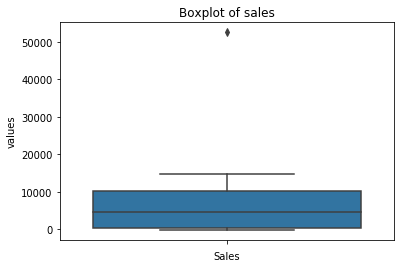

In [15]:
    sns.boxplot(y=df['Sales'])
    plt.xlabel("Sales")
    plt.ylabel("values")
    plt.title("Boxplot of sales")
    plt.show()

In [16]:
    # Quartiles and IQR
    q25,q75 = np.percentile(df['Sales'],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    LL = q25 - (1.5 * IQR)
    UL = q75 + (1.5 * IQR)
    
    # Capping with ul for maxmimum values 
    # For inliers
    df.loc[df['Sales'] < LL ,'Sales'] = LL 

   # For ioutliers
    df.loc[df['Sales'] > UL ,'Sales'] = UL 

 Boxplot fot Sales after outlier treatment 

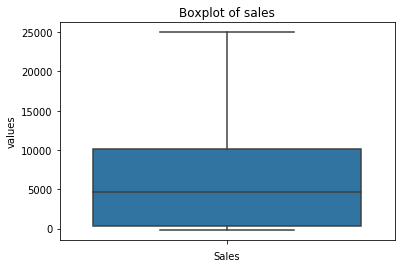

In [17]:
    sns.boxplot(y=df['Sales'])
    plt.xlabel("Sales")
    plt.ylabel("values")
    plt.title("Boxplot of sales")
    plt.show()

#### Visualisation Of Sales Variable 

Text(0.5, 1.0, 'Distribuation of Sales')

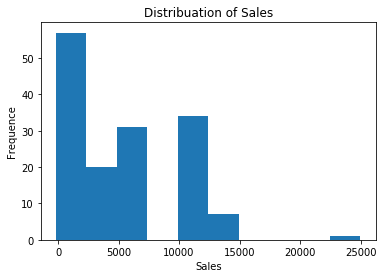

In [18]:
# histogram plot of Sales Variable to check the distribution 
plt.hist(df['Sales'])
plt.xlabel("Sales")
plt.ylabel("Frequence")
plt.title('Distribuation of Sales')

### Feature Engineering 

In [19]:
df = df[~df['ISO_Week'].isin(['2018-42', '2018-43', '2018-44', '2018-45', '2018-46', '2018-47', '2018-48', '2018-49', '2018-50', '2018-51', '2018-52'])]

In [20]:
df

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER
...,...,...,...,...
134,ProductC,2018-37,11856.0,AUTUMN
135,ProductC,2018-38,4185.0,AUTUMN
136,ProductC,2018-39,4357.0,AUTUMN
137,ProductC,2018-40,3730.0,AUTUMN


In [21]:
df1 = df1[df1['ISO_Week'].isin(['2018-42', '2018-43', '2018-44', '2018-45', '2018-46', '2018-47', '2018-48', '2018-49', '2018-50', '2018-51', '2018-52'])]

In [22]:
df1

,SKU,ISO_Week,Sales,Season
43,ProductA,2018-42,4740.0,AUTUMN
44,ProductA,2018-43,4341.0,AUTUMN
45,ProductA,2018-44,5363.0,AUTUMN
46,ProductA,2018-45,12120.0,AUTUMN
47,ProductA,2018-46,3314.0,AUTUMN
48,ProductA,2018-47,4673.0,AUTUMN
49,ProductA,2018-48,12376.0,AUTUMN
50,ProductA,2018-49,14853.0,WINTER
51,ProductA,2018-50,12447.0,WINTER
52,ProductA,2018-51,12247.0,WINTER


In [23]:
Data = df1.copy()

## Model Development 

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [25]:
df.head()

,SKU,ISO_Week,Sales,Season
0,0,0,0.0,3
1,0,1,0.0,3
2,0,2,0.0,3
3,0,3,6988.0,3
4,0,3,6988.0,3


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

objList = df1.select_dtypes(include = "object").columns

for feat in objList:
    df1[feat] = le.fit_transform(df1[feat].astype(str))

In [27]:
df1.head()

,SKU,ISO_Week,Sales,Season
43,0,0,4740.0,0
44,0,1,4341.0,0
45,0,2,5363.0,0
46,0,3,12120.0,0
47,0,4,3314.0,0


In [28]:
X = df.iloc[:, [0,1,3]].values
y = df.iloc[:, 2].values

In [29]:
X1 = df1.iloc[:, [0,1,3]].values
y1 = df1.iloc[:, 2].values

In [30]:
print(X)

[[ 0  0  3]
 [ 0  1  3]
 [ 0  2  3]
 [ 0  3  3]
 [ 0  3  3]
 [ 0  4  3]
 [ 0  5  3]
 [ 0  6  3]
 [ 0  7  3]
 [ 0  8  1]
 [ 0  9  1]
 [ 0 10  1]
 [ 0 11  1]
 [ 0 12  1]
 [ 0 13  1]
 [ 0 14  1]
 [ 0 14  1]
 [ 0 15  1]
 [ 0 16  1]
 [ 0 17  1]
 [ 0 18  1]
 [ 0 19  1]
 [ 0 20  1]
 [ 0 21  1]
 [ 0 22  2]
 [ 0 23  2]
 [ 0 24  2]
 [ 0 25  2]
 [ 0 26  2]
 [ 0 27  2]
 [ 0 28  2]
 [ 0 29  2]
 [ 0 30  2]
 [ 0 31  2]
 [ 0 32  2]
 [ 0 33  2]
 [ 0 34  2]
 [ 0 35  0]
 [ 0 36  0]
 [ 0 37  0]
 [ 0 38  0]
 [ 0 39  0]
 [ 0 40  0]
 [ 1  0  3]
 [ 1  1  3]
 [ 1  2  3]
 [ 1  3  3]
 [ 1  4  3]
 [ 1  5  3]
 [ 1  6  3]
 [ 1  7  3]
 [ 1  7  3]
 [ 1  8  1]
 [ 1  9  1]
 [ 1 10  1]
 [ 1 11  1]
 [ 1 12  1]
 [ 1 13  1]
 [ 1 14  1]
 [ 1 15  1]
 [ 1 16  1]
 [ 1 17  1]
 [ 1 18  1]
 [ 1 19  1]
 [ 1 20  1]
 [ 1 21  1]
 [ 1 22  2]
 [ 1 23  2]
 [ 1 24  2]
 [ 1 25  2]
 [ 1 26  2]
 [ 1 27  2]
 [ 1 28  2]
 [ 1 29  2]
 [ 1 30  2]
 [ 1 31  2]
 [ 1 32  2]
 [ 1 33  2]
 [ 1 34  2]
 [ 1 35  0]
 [ 1 36  0]
 [ 1 37  0]
 [ 1 38  0]
 [ 1

In [31]:
print(y)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.98800000e+03
  6.98800000e+03  6.74300000e+03  4.11200000e+03  5.73200000e+03
  5.27977622e+03  5.55900000e+03  5.38100000e+03  1.17090000e+04
  1.04100000e+04  1.02110000e+04  1.03780000e+04  1.00120000e+04
  1.00120000e+04  1.01780000e+04  1.13160000e+04  5.27977622e+03
  1.13840000e+04  1.04700000e+04  5.47100000e+03  4.87400000e+03
  6.74600000e+03  1.07770000e+04  3.73000000e+03  1.11590000e+04
  6.56800000e+03  4.91500000e+03  5.27977622e+03  5.27977622e+03
  4.57900000e+03  6.78000000e+03  3.64800000e+03  3.03600000e+03
  3.42500000e+03  4.97900000e+03  3.11500000e+03  3.72200000e+03
  6.54500000e+03  6.69900000e+03  6.41200000e+03  5.27977622e+03
  5.27977622e+03  5.27977622e+03 -2.30000000e+01  4.46000000e+02
  3.61000000e+02  2.29000000e+02  2.19000000e+02  2.19000000e+02
  4.95000000e+02  2.78000000e+02  3.16000000e+02 -5.00000000e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

### Random Forest Regression 

In [32]:
# Applying RF Regression Model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
pred = regressor.predict(X1)

In [34]:
pred

array([1094.        , 1094.        , 1094.        , 5286.8       ,
       6298.8       , 4953.4       , 5662.3       , 5418.88811189,
       5467.55524476, 5406.47762238, 7902.07762238, 5279.77622378,
       5279.77622378, 5279.77622378, 3210.46573427,  306.6       ,
        405.        ,  334.6       ,  345.        ,  400.2       ,
        325.2       ,  282.1       , 5745.5       , 5745.5       ,
       5745.5       , 5745.5       , 5745.5       , 5745.5       ,
       5745.5       , 5745.5       , 5745.5       , 5745.5       ,
       5745.5       ])

In [35]:
df2 = pd.DataFrame(pred)
df2.columns = ['Forecast']
df2

,Forecast
0,1094.000000
1,1094.000000
2,1094.000000
3,5286.800000
4,6298.800000
5,4953.400000
6,5662.300000
7,5418.888112
8,5467.555245
9,5406.477622


In [36]:
Data = Data.reset_index()
Data = Data.drop(['index'],axis=1)

In [37]:
Data['Forecast'] = df2['Forecast']
Data

,SKU,ISO_Week,Sales,Season,Forecast
0,ProductA,2018-42,4740.0,AUTUMN,1094.000000
1,ProductA,2018-43,4341.0,AUTUMN,1094.000000
2,ProductA,2018-44,5363.0,AUTUMN,1094.000000
3,ProductA,2018-45,12120.0,AUTUMN,5286.800000
4,ProductA,2018-46,3314.0,AUTUMN,6298.800000
5,ProductA,2018-47,4673.0,AUTUMN,4953.400000
6,ProductA,2018-48,12376.0,AUTUMN,5662.300000
7,ProductA,2018-49,14853.0,WINTER,5418.888112
8,ProductA,2018-50,12447.0,WINTER,5467.555245
9,ProductA,2018-51,12247.0,WINTER,5406.477622


In [38]:
del Data['Sales']

In [39]:
del Data['Season']

In [40]:
Data

,SKU,ISO_Week,Forecast
0,ProductA,2018-42,1094.000000
1,ProductA,2018-43,1094.000000
2,ProductA,2018-44,1094.000000
3,ProductA,2018-45,5286.800000
4,ProductA,2018-46,6298.800000
5,ProductA,2018-47,4953.400000
6,ProductA,2018-48,5662.300000
7,ProductA,2018-49,5418.888112
8,ProductA,2018-50,5467.555245
9,ProductA,2018-51,5406.477622


In [41]:
Data.to_excel('forecast_data.xlsx', index = False)

 Final Output which is saved as " forecast_data.xlsx " in excel formate  

### End Model 